# RNN Toys

En este notebook, mostraremos como crear redes recurrentes sencillas para problemas de juguete que nos permiten mayor control sobre lo que debiésemos obtener como resultado.


<table align='left'>
<tr>
<td><img src='https://miro.medium.com/max/2658/0*sm-7smnbyLioThPQ.png' width='650'/></td>
</tr>
</table>





### **Helpers**

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd

import itertools 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# **Ejemplo 1 : Many to One - Clasificación**

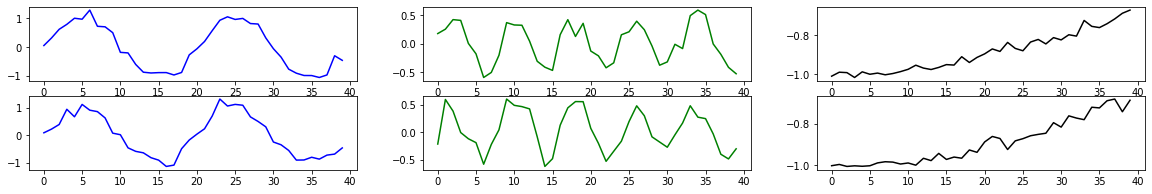

In [ ]:
import numpy as np

def make_examples(n,time_steps = 40):
  n_features = 1
  time = np.arange(0, time_steps, 1)
  data_x = np.zeros((3*n,time_steps,n_features)) 
  data_y = np.zeros((3*n,1)) 

  for idx in range(0,3*n,3):

    signal1   = np.sin(time*np.pi/10) + np.random.normal(0,0.15,time_steps)
    signal2   = 0.5*np.sin(time*np.pi/4) + + np.random.normal(0,0.15,time_steps)
    signal3   = 0.05*(time/15+np.random.normal(0,0.1,time_steps))**2 + 0.1*np.random.normal(0,0.1,time_steps)-1
    data_x[idx,:,0] = signal1
    data_x[idx+1,:,0] = signal2
    data_x[idx+2,:,0] = signal3
    
    data_y[idx,0] = 0
    data_y[idx+1,0] = 1
    data_y[idx+2,0] = 2

  return data_x, data_y

import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,3, frameon=False, figsize=(20, 3))
data_x, data_y = make_examples(4)
ax[0,0].plot(data_x[0,:,:],'b')
ax[0,1].plot(data_x[1,:,:],'g')
ax[0,2].plot(data_x[2,:,:],'k')

ax[1,0].plot(data_x[-3,:,:],'b')
ax[1,1].plot(data_x[-2,:,:],'g')
ax[1,2].plot(data_x[-1,:,:],'k')
plt.show()

train_x, train_classes = make_examples(10)
test_x, test_classes = make_examples(5)

In [ ]:
from tensorflow.keras.utils import to_categorical
 
train_y = to_categorical(train_classes)
test_y = to_categorical(test_classes)

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)


(30, 40, 1) (30, 3)
(15, 40, 1) (15, 3)


## Modelo Denso

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_train,time_steps,n_features = train_x.shape
n_test,time_steps,n_features = test_x.shape

XFlatten_train = np.reshape(train_x,(n_train,time_steps*n_features)) #X flattened
XFlatten_test = np.reshape(test_x,(n_test,time_steps*n_features)) #X flattened
print(XFlatten_train.shape)
print(XFlatten_test.shape)

n_total_features = XFlatten_train.shape[1]

fnn = Sequential()
fnn.add(Dense(10,input_dim=n_total_features,activation='relu'))
fnn.add(Dense(3,activation='softmax'))

fnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fnn.summary()


(30, 40)
(15, 40)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                410       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 443
Trainable params: 443
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_fnn = fnn.fit(XFlatten_train,train_y,epochs=50,batch_size=20,verbose=1,validation_data=(XFlatten_test,test_y))


Epoch 1/50
2/2 [==============================] - 2s 403ms/step - loss: 1.3674 - accuracy: 0.3333 - val_loss: 1.2922 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 1.3113 - accuracy: 0.3333 - val_loss: 1.2389 - val_accuracy: 0.3333
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 1.2531 - accuracy: 0.3333 - val_loss: 1.1879 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 0s 43ms/step - loss: 1.2014 - accuracy: 0.3333 - val_loss: 1.1403 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 0s 77ms/step - loss: 1.1498 - accuracy: 0.3333 - val_loss: 1.0955 - val_accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 0s 55ms/step - loss: 1.1051 - accuracy: 0.3333 - val_loss: 1.0533 - val_accuracy: 0.3333
Epoch 7/50
2/2 [==============================] - 0s 39ms/step - loss: 1.0631 - accuracy: 0.3333 - val_loss: 1.0133 - val_accuracy: 0.4000
Epoch 8/50
2/2 [==========

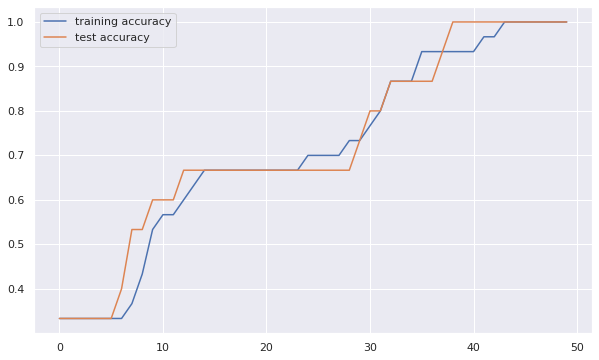

In [ ]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.plot(history_fnn.history['accuracy'],label='training accuracy')
ax.plot(history_fnn.history['val_accuracy'],label='test accuracy')
plt.legend(loc='upper left')
plt.show()

## Modelo Recurrente

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding


print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, SimpleRNN

n_steps = 40
n_features = 1

rnn = Sequential()
rnn.add(SimpleRNN(10, input_shape=(n_steps, n_features), return_sequences=False))
rnn.add(Dense(3,activation='softmax'))

rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn.summary()

#10 x 1 pesos + 10 biases = 20 params (para leer el input)
#10 x 10 


(30, 40, 1) (30, 3)
(15, 40, 1) (15, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = rnn.fit(train_x, train_y, epochs=50, verbose=1, validation_data=(test_x,test_y), shuffle=True, batch_size=20)


Epoch 1/50
2/2 [==============================] - 3s 657ms/step - loss: 1.1082 - accuracy: 0.5333 - val_loss: 1.1790 - val_accuracy: 0.4000
Epoch 2/50
2/2 [==============================] - 0s 53ms/step - loss: 1.0870 - accuracy: 0.5333 - val_loss: 1.1610 - val_accuracy: 0.4000
Epoch 3/50
2/2 [==============================] - 0s 47ms/step - loss: 1.0651 - accuracy: 0.5333 - val_loss: 1.1429 - val_accuracy: 0.4000
Epoch 4/50
2/2 [==============================] - 0s 45ms/step - loss: 1.0437 - accuracy: 0.5667 - val_loss: 1.1245 - val_accuracy: 0.4000
Epoch 5/50
2/2 [==============================] - 0s 56ms/step - loss: 1.0233 - accuracy: 0.6000 - val_loss: 1.1064 - val_accuracy: 0.4000
Epoch 6/50
2/2 [==============================] - 0s 56ms/step - loss: 1.0005 - accuracy: 0.6000 - val_loss: 1.0887 - val_accuracy: 0.4000
Epoch 7/50
2/2 [==============================] - 0s 59ms/step - loss: 0.9794 - accuracy: 0.6333 - val_loss: 1.0706 - val_accuracy: 0.4667
Epoch 8/50
2/2 [==========

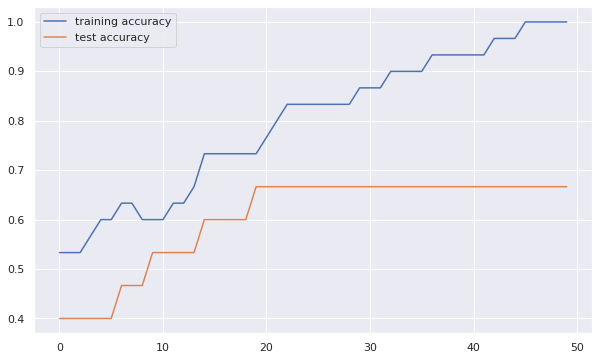

In [ ]:
history_accuracy_train = history.history['accuracy']
history_accuracy_test = history.history['val_accuracy']

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.plot(history_accuracy_train,label='training accuracy')
ax.plot(history_accuracy_test,label='test accuracy')
plt.legend(loc='upper left')
plt.show()

Confusion matrix, without normalization


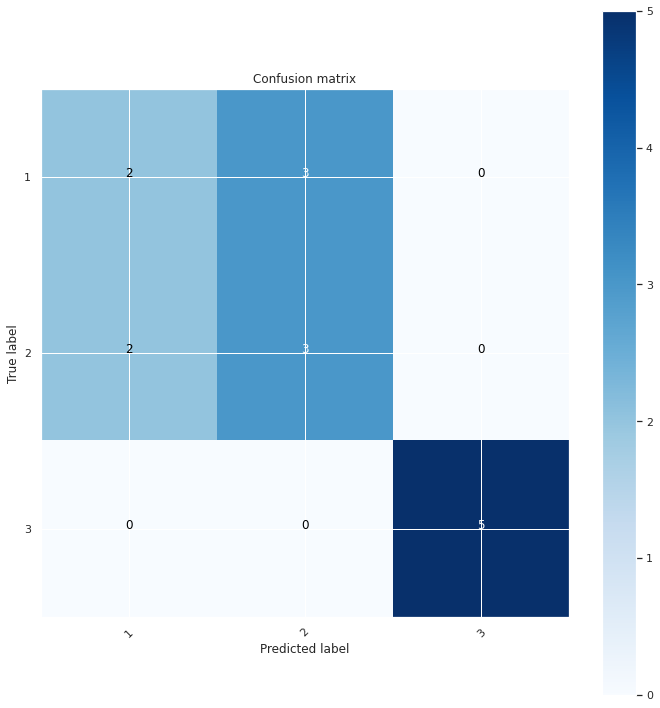

In [ ]:
prob_predictions = rnn.predict(test_x)
#print(prob_predictions.shape)

predictions = np.argmax(prob_predictions, axis=1)
diff_predictions = np.unique(predictions)
#print(diff_predictions)


from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(test_classes, predictions, labels=np.unique(test_classes))

plt.figure(figsize=(10, 10))
plot_confusion_matrix(cfm, classes=['1','2','3'], normalize=False,
                      title='Confusion matrix')


## Modelo Convolucional

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=5, kernel_size=5, activation='relu', padding='same', input_shape=(40, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(filters=5, kernel_size=5, activation='relu', padding='same'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(3, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 40, 5)             30        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 5)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 20, 5)             130       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 10, 5)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                

In [ ]:
history = cnn_model.fit(train_x, train_y, epochs=50, verbose=1, validation_data=(test_x,test_y), shuffle=True, batch_size=20)


Epoch 1/50
2/2 [==============================] - 1s 208ms/step - loss: 1.1026 - accuracy: 0.3333 - val_loss: 1.1027 - val_accuracy: 0.3333
Epoch 2/50
2/2 [==============================] - 0s 27ms/step - loss: 1.0799 - accuracy: 0.3333 - val_loss: 1.0806 - val_accuracy: 0.3333
Epoch 3/50
2/2 [==============================] - 0s 26ms/step - loss: 1.0601 - accuracy: 0.3333 - val_loss: 1.0593 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 0s 49ms/step - loss: 1.0385 - accuracy: 0.3333 - val_loss: 1.0391 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 0s 28ms/step - loss: 1.0197 - accuracy: 0.3333 - val_loss: 1.0199 - val_accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 0s 27ms/step - loss: 0.9988 - accuracy: 0.3333 - val_loss: 1.0018 - val_accuracy: 0.3333
Epoch 7/50
2/2 [==============================] - 0s 29ms/step - loss: 0.9807 - accuracy: 0.3333 - val_loss: 0.9841 - val_accuracy: 0.3333
Epoch 8/50
2/2 [==========

# **Ejemplo 2: Many to One - Regresión**

In [ ]:
import numpy as np

def make_examples(n,time_steps = 40):
  n_features = 3
  time = np.arange(0, time_steps, 1)
  data_x = np.zeros((n,time_steps,n_features)) 
  data_y = np.zeros((n,1)) 

  for idx in range(0,n,3):

    signal1   = np.sin(time*np.pi/10) + np.random.normal(0,0.15,time_steps)
    signal2   = 0.5*np.sin(time*np.pi/4) + + np.random.normal(0,0.15,time_steps)
    signal3   = 0.05*(time/15+np.random.normal(0,0.1,time_steps))**2 + 0.1*np.random.normal(0,0.1,time_steps)-1
    data_x[idx,:,0] = signal1
    data_x[idx,:,1] = signal2
    data_x[idx,:,2] = signal3
    
    data_y[idx,0] = data_x[idx,0,0] + data_x[idx,0,1]  

  return data_x, data_y

train_x, train_classes = make_examples(100)
test_x, test_classes = make_examples(200)

train_y = train_classes
test_y = test_classes


## Modelo Denso

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

n_train,time_steps,n_features = train_x.shape
n_test,time_steps,n_features = test_x.shape

XFlatten_train = np.reshape(train_x,(n_train,time_steps*n_features)) #X flattened
XFlatten_test = np.reshape(test_x,(n_test,time_steps*n_features)) #X flattened
print(XFlatten_train.shape, train_y.shape)
print(XFlatten_test.shape, test_y.shape)

n_total_features = XFlatten_train.shape[1]

fnn = Sequential()
fnn.add(Dense(10,input_dim=n_total_features,activation='relu'))
fnn.add(Dense(1,activation='linear'))

fnn.compile(loss='mse', optimizer='adam', metrics=['mae'])
fnn.summary()

(100, 120) (100, 1)
(200, 120) (200, 1)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                1210      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_fnn = fnn.fit(XFlatten_train,train_y,epochs=50,batch_size=20,verbose=1,validation_data=(XFlatten_test,test_y))


Epoch 1/50
5/5 [==============================] - 0s 35ms/step - loss: 0.0289 - mae: 0.0888 - val_loss: 0.0321 - val_mae: 0.0861
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.0198 - mae: 0.0664 - val_loss: 0.0196 - val_mae: 0.0665
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.0201 - mae: 0.0700 - val_loss: 0.0185 - val_mae: 0.0629
Epoch 4/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0168 - mae: 0.0636 - val_loss: 0.0191 - val_mae: 0.0669
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0170 - mae: 0.0610 - val_loss: 0.0207 - val_mae: 0.0698
Epoch 6/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0157 - mae: 0.0587 - val_loss: 0.0181 - val_mae: 0.0646
Epoch 7/50
5/5 [==============================] - 0s 13ms/step - loss: 0.0152 - mae: 0.0598 - val_loss: 0.0173 - val_mae: 0.0620
Epoch 8/50
5/5 [==============================] - 0s 12ms/step - loss: 0.0153 - mae: 0.0601 - val

No handles with labels found to put in legend.


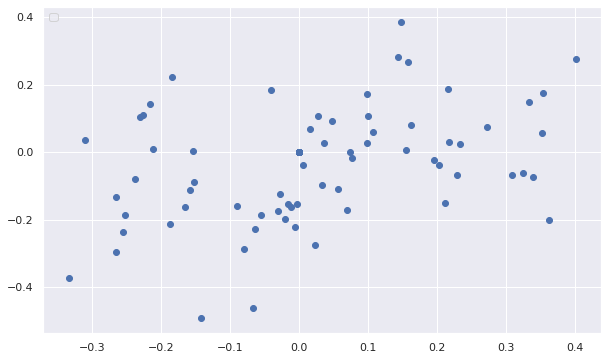

In [ ]:
pred_test = fnn.predict(XFlatten_test)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.scatter(test_y,pred_test)
plt.legend(loc='upper left')
plt.show()



## Modelo Recurrente

In [ ]:

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import SpatialDropout1D
from keras.layers import Embedding


print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, SimpleRNN

n_steps = 40
n_features = 3

rnn2 = Sequential()
rnn2.add(LSTM(10, input_shape=(n_steps, n_features), return_sequences=False))
rnn2.add(Dense(1,activation='linear'))

rnn2.compile(loss='mse', optimizer='adam', metrics=['mae'])


rnn2.summary()



(100, 40, 3) (100, 1)
(200, 40, 3) (200, 1)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                560       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = rnn2.fit(train_x, train_y, epochs=50, verbose=1, validation_data=(test_x,test_y), shuffle=True, batch_size=20)


Epoch 1/50
5/5 [==============================] - 3s 138ms/step - loss: 0.0181 - mae: 0.0694 - val_loss: 0.0175 - val_mae: 0.0717
Epoch 2/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0146 - mae: 0.0653 - val_loss: 0.0154 - val_mae: 0.0704
Epoch 3/50
5/5 [==============================] - 0s 25ms/step - loss: 0.0140 - mae: 0.0664 - val_loss: 0.0140 - val_mae: 0.0686
Epoch 4/50
5/5 [==============================] - 0s 24ms/step - loss: 0.0142 - mae: 0.0678 - val_loss: 0.0132 - val_mae: 0.0662
Epoch 5/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0140 - mae: 0.0646 - val_loss: 0.0131 - val_mae: 0.0621
Epoch 6/50
5/5 [==============================] - 0s 23ms/step - loss: 0.0138 - mae: 0.0598 - val_loss: 0.0133 - val_mae: 0.0580
Epoch 7/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0137 - mae: 0.0557 - val_loss: 0.0135 - val_mae: 0.0556
Epoch 8/50
5/5 [==============================] - 0s 22ms/step - loss: 0.0137 - mae: 0.0552 - va

No handles with labels found to put in legend.


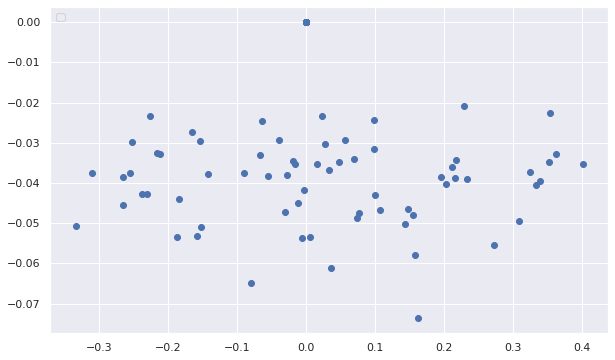

In [ ]:
pred_test = rnn2.predict(test_x)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.scatter(test_y,pred_test)
plt.legend(loc='upper left')
plt.show()


# **Ejemplo3 : Many to Many**



In [ ]:
import numpy as np
from random import random

threshold = 15

def make_examples(n,threshold):

  time_steps = 60
  X = np.random.uniform(0,1,(n,time_steps))
  sumX = np.cumsum(X,axis=1)
  y = np.array(sumX < threshold,dtype=int)
  print("class 1: ",np.sum(y==1))
  print("class 2: ",np.sum(y==0))
  X=X[:, :, np.newaxis]
  y=y[:,:,np.newaxis]
  return X,y 

train_x, train_y = make_examples(50,threshold)
test_x, test_y = make_examples(50,threshold)

print(train_x.shape)
print(train_y.shape)

class 1:  1507
class 2:  1493
class 1:  1506
class 2:  1494
(50, 60, 1)
(50, 60, 1)


## Forward LSTM

In [ ]:

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM

n_steps = 60
n_features = 1

model = Sequential()
model.add(LSTM(20, input_shape=(n_steps, 1), return_sequences=True, go_backwards=False))
model.add(Dense(1,activation='sigmoid'))

#params recurrrentes 20*20 = 400
#params entrada = 20 + 20 = 40
#params salida = 20 + 1 = 21

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(train_x, train_y, epochs=20, verbose=0, validation_data=(test_x,test_y), shuffle=True, batch_size=20)


(50, 60, 1) (50, 60, 1)
(50, 60, 1) (50, 60, 1)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 60, 20)            1760      
                                                                 
 dense_9 (Dense)             (None, 60, 1)             21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


(1, 60, 1)


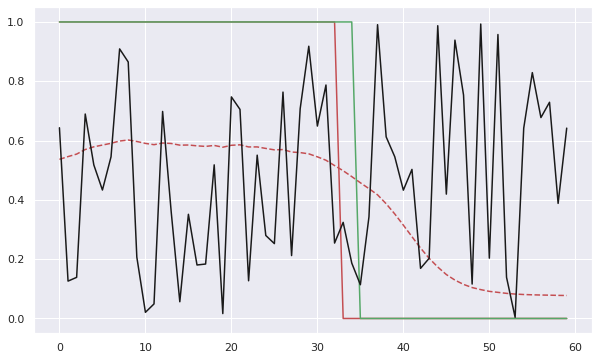

PRED SHAPE (50, 60, 1)
(60,)


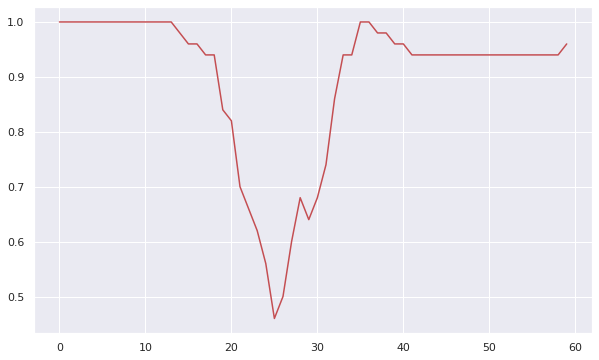

In [ ]:
idx = 0
example = test_x[idx,:,:]
example = example[np.newaxis, :, :]
pred = model.predict(example) 
pred_class = model.predict(example) > 0.5
print(pred.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.plot(pred[0,:,0],'r--')
ax.plot(pred_class[0,:,0],'r')
ax.plot(test_y[idx,:,0],'g')
ax.plot(example[0,:,0],'k')
plt.show()


pred = model.predict(test_x) 
print("PRED SHAPE",pred.shape)
pred_class = pred > 0.5
accuracy = pred_class==test_y
accuracy = accuracy[:,:,0]
accuracy = np.array(accuracy,dtype=float)
accuracy = np.mean(accuracy,axis=0)
print(accuracy.shape) 

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.plot(accuracy,'r-')
plt.show()



## Backward LSTM

In [ ]:

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM

n_steps = 60
n_features = 1

model = Sequential()
model.add(LSTM(20, input_shape=(n_steps, 1), return_sequences=True, go_backwards=True))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(train_x, train_y, epochs=40, verbose=0, validation_data=(test_x,test_y), shuffle=True, batch_size=20)



(50, 60, 1) (50, 60, 1)
(50, 60, 1) (50, 60, 1)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 20)            1760      
                                                                 
 dense_10 (Dense)            (None, 60, 1)             21        
                                                                 
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


(1, 60, 1)


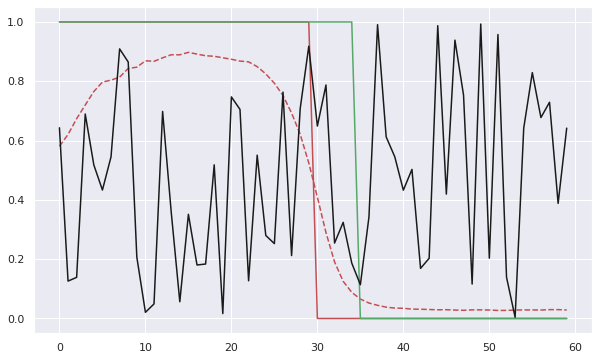

(60,)


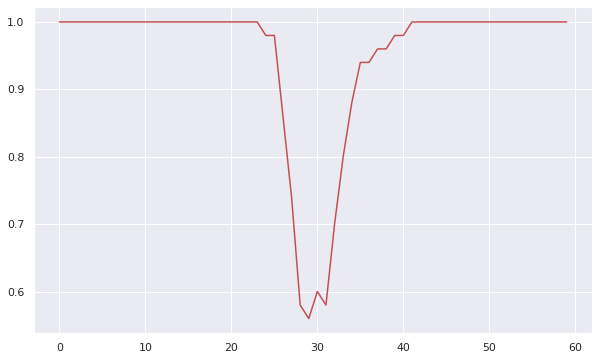

In [ ]:
idx = 0
example = test_x[idx,:,:]
example = example[np.newaxis, :, :]
pred = model.predict(example) 
pred_class = model.predict(example) > 0.5
print(pred.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.plot(pred[0,:,0],'r--')
ax.plot(pred_class[0,:,0],'r')
ax.plot(test_y[idx,:,0],'g')
ax.plot(example[0,:,0],'k')
plt.show()


pred = model.predict(test_x) 
pred_class = pred > 0.5
accuracy = pred_class==test_y
accuracy = accuracy[:,:,0]
accuracy = np.array(accuracy,dtype=float)
accuracy = np.mean(accuracy,axis=0)
print(accuracy.shape) 

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.plot(accuracy,'r-')
plt.show()



## Bi LSTM

In [ ]:

print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, LSTM
from keras.layers import Bidirectional

n_steps = 60
n_features = 1

model = Sequential()
model.add(Bidirectional(LSTM(20, return_sequences=True), input_shape=(n_steps, 1), merge_mode='concat'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

history = model.fit(train_x, train_y, epochs=40, verbose=0, validation_data=(test_x,test_y), shuffle=True, batch_size=20)



(50, 60, 1) (50, 60, 1)
(50, 60, 1) (50, 60, 1)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 60, 40)           3520      
 l)                                                              
                                                                 
 dense_11 (Dense)            (None, 60, 1)             41        
                                                                 
Total params: 3,561
Trainable params: 3,561
Non-trainable params: 0
_________________________________________________________________


(1, 60, 1)


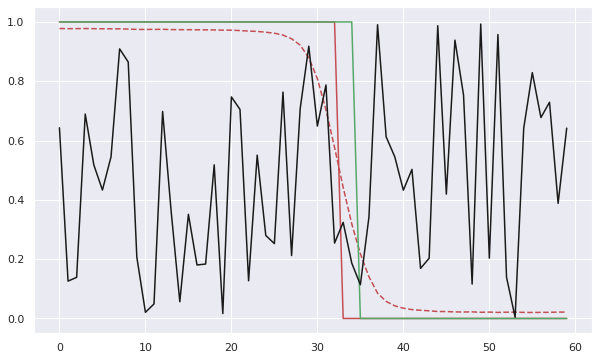

(60,)


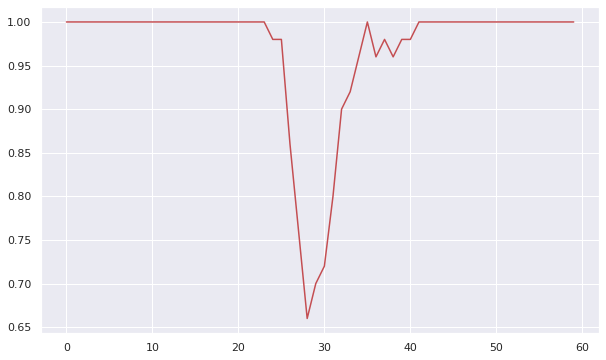

In [ ]:
idx = 0
example = test_x[idx,:,:]
example = example[np.newaxis, :, :]
pred = model.predict(example) 
pred_class = model.predict(example) > 0.5
print(pred.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.plot(pred[0,:,0],'r--')
ax.plot(pred_class[0,:,0],'r')
ax.plot(test_y[idx,:,0],'g')
ax.plot(example[0,:,0],'k')
plt.show()


pred = model.predict(test_x) 
pred_class = pred > 0.5
accuracy = pred_class==test_y
accuracy = accuracy[:,:,0]
accuracy = np.array(accuracy,dtype=float)
accuracy = np.mean(accuracy,axis=0)
print(accuracy.shape) 

fig, ax = plt.subplots(1,1, frameon=False, figsize=(10, 6))
ax.plot(accuracy,'r-')
plt.show()

